In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
patients_df=pd.read_csv("patients_df")

In [4]:
patients_df

,subject_id,sex,race,sex_race,age,split
0,10000032,0,0,1,2,0
1,10000764,1,0,0,0,0
2,10000935,0,1,3,2,0
3,10000980,0,1,3,1,0
4,10001176,0,0,1,1,2
...,...,...,...,...,...,...
49761,19999156,0,0,1,1,0
49762,19999287,0,1,3,1,0
49763,19999442,1,0,0,2,0
49764,19999733,0,0,1,3,0


In [5]:
image_mask_df=pd.read_csv("image_mask_df")

In [6]:
image_mask_df.head()

,dicom_id,subject_id,study_id,reduced_path,path,ViewPosition,No Finding,Pleural Effusion,Cardiomegaly,Pneumothorax,sex,race,sex_race,age,split,Left Lung,Right Lung,Heart,Width,Height
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,p10/p10000032/s50414267/02aa804e-bde0afdd-112c...,/home/lchanch/initial_image_prepro/downsample_...,PA,1.0,0.0,0.0,0.0,0,0,1,2,0,792824 6 795358 20 797892 34 800426 48 802960 ...,812519 6 815054 18 817588 30 820123 42 822658 ...,3015910 10 3018442 28 3020973 47 3023504 66 30...,2544,3056
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,p10/p10000032/s53189527/2a2277a9-b0ded155-c0de...,/home/lchanch/initial_image_prepro/downsample_...,PA,1.0,0.0,0.0,0.0,0,0,1,2,0,1019278 16 1021792 49 1024306 82 1026834 101 1...,1026209 9 1028738 27 1031267 45 1033797 62 103...,3288188 17 3290708 52 3293228 87 3295759 111 3...,2544,3056
2,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,p10/p10000032/s53911762/68b5c4b1-227d0485-9cc3...,/home/lchanch/initial_image_prepro/downsample_...,AP,1.0,0.0,0.0,0.0,0,0,1,2,0,1451211 25 1453702 77 1456216 106 1458753 112 ...,1455655 10 1458178 29 1460700 49 1463222 69 14...,3479554 9 3482082 27 3484611 43 3487139 61 348...,2539,2705
3,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,10000032,53911762,p10/p10000032/s53911762/fffabebf-74fd3a1f-673b...,/home/lchanch/initial_image_prepro/downsample_...,AP,1.0,0.0,0.0,0.0,0,0,1,2,0,963370 5 965624 17 967879 28 970133 40 972388 ...,1375933 5 1378189 13 1380444 22 1382699 31 138...,3085691 8 3087944 25 3090197 42 3092450 59 309...,2258,2906
4,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,10000032,56699142,p10/p10000032/s56699142/ea030e7a-2e3b1346-bc51...,/home/lchanch/initial_image_prepro/downsample_...,AP,1.0,0.0,0.0,0.0,0,0,1,2,0,912403 7 914936 21 917468 37 920001 51 922534 ...,911748 8 914278 24 916808 41 919339 57 921869 ...,3089645 75 3092183 93 3094720 111 3097258 128 ...,2544,3056


In [ ]:
#===========================demographic distribution analysis=======================

In [7]:
patients_df.head(1)

,subject_id,sex,race,sex_race,age,split
0,10000032,0,0,1,2,0


In [10]:
patients_df.duplicated().sum()

0

In [12]:
#Mappings
sex_map = {0: "Female", 1: "Male"}

race_map = {
    0: "White",
    1: "Black",
    2: "Asian",
    3: "Other"
}

age_map = {
    3: "18–40",
    2: "40–60",
    1: "60–80",
    0: ">80"
}

sex_race_map = {
    0: "White Male",
    1: "White Female",
    2: "Black Male",
    3: "Black Female",
    4: "Asian Male",
    5: "Asian Female",
    6: "Other Male",
    7: "Other Female"
}

In [26]:
def build_demo_table(series, attribute_name, label_map):
    counts = series.value_counts()
    percentages = counts * 100 / counts.sum()

    return pd.DataFrame({
        "Attribute": attribute_name,
        "Group": counts.index.map(label_map),
        "Count": counts.values,
        "Percentage (%)": percentages.round(2)
    })


In [27]:
sex_table = build_demo_table(
    patients_df["sex"],
    "Sex",
    sex_map
)

race_table = build_demo_table(
    patients_df["race"],
    "Race",
    race_map
)

age_table = build_demo_table(
    patients_df["age"],
    "Age",
    age_map
)

sex_race_table = build_demo_table(
    patients_df["sex_race"],
    "SexRace",
    sex_race_map
)

final_demo_table = pd.concat(
    [sex_table, race_table, age_table, sex_race_table],
    ignore_index=True
)

final_demo_table


,Attribute,Group,Count,Percentage (%)
0,Sex,Female,25826,51.89
1,Sex,Male,23940,48.11
2,Race,White,31924,64.15
3,Race,Black,8446,16.97
4,Race,Other,7587,15.25
5,Race,Asian,1809,3.64
6,Age,60–80,18314,36.80
7,Age,40–60,15535,31.22
8,Age,>80,8099,16.27
9,Age,18–40,7818,15.71


In [18]:
def get_percentage(series):
    return series.value_counts(normalize=True) * 100


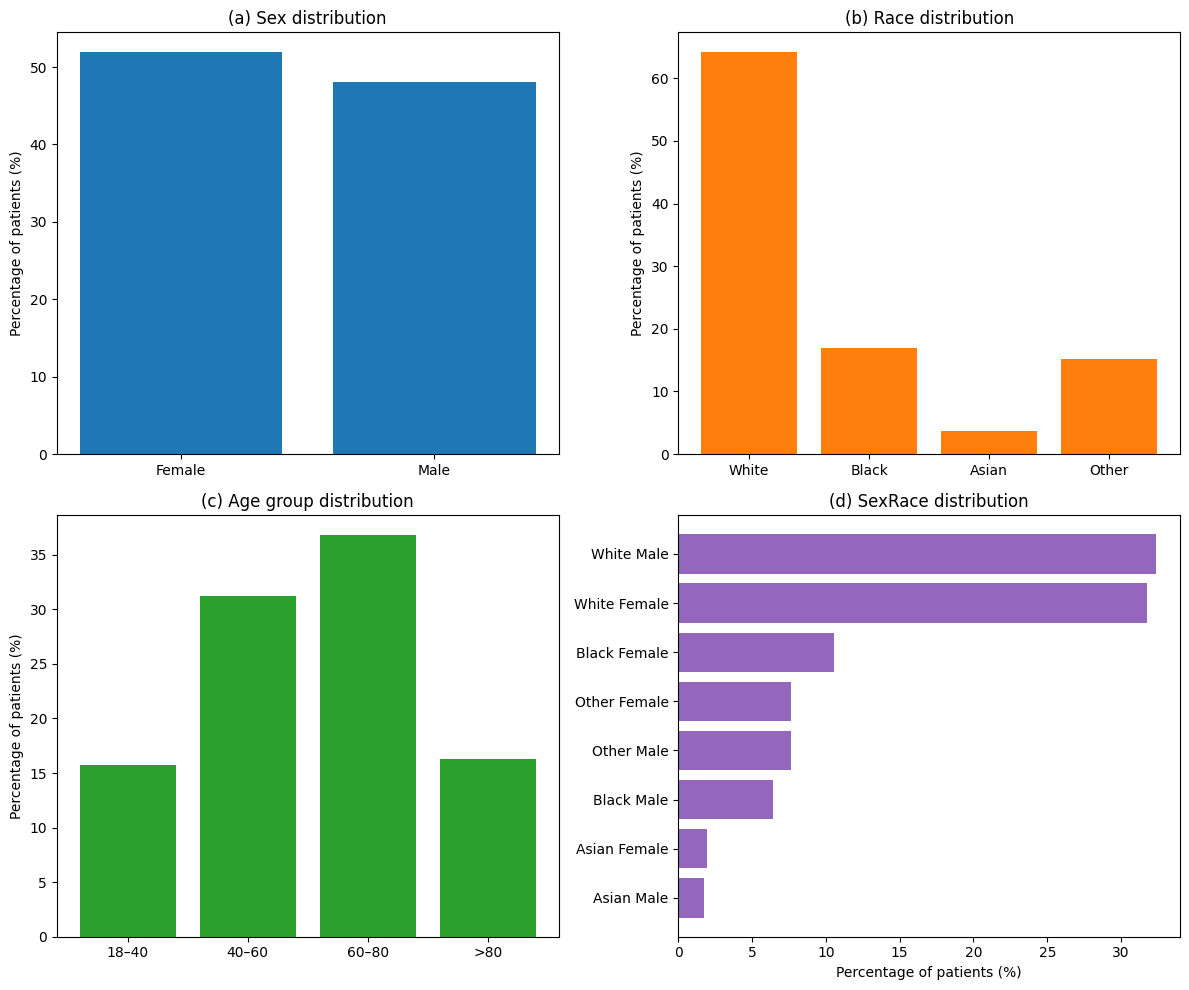

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

colors = plt.cm.tab10.colors

# Sex
sex_dist = get_percentage(patients_df["sex"])
sex_labels = [sex_map[i] for i in sex_dist.index]

axes[0].bar(sex_labels, sex_dist.values, color=colors[0])
axes[0].set_title("(a) Sex distribution")
axes[0].set_ylabel("Percentage of patients (%)")


# Race
race_dist = get_percentage(patients_df["race"])
race_order = [0, 1, 2, 3]  # White, Black, Asian, Other
race_dist = race_dist.loc[race_order]
race_labels = [race_map[i] for i in race_order]

axes[1].bar(race_labels, race_dist.values, color=colors[1])
axes[1].set_title("(b) Race distribution")
axes[1].set_ylabel("Percentage of patients (%)")


# Age
age_dist = get_percentage(patients_df["age"])
age_order = [3, 2, 1, 0]  # 18–40 → >80
age_dist = age_dist.loc[age_order]
age_labels = [age_map[i] for i in age_order]

axes[2].bar(age_labels, age_dist.values, color=colors[2])
axes[2].set_title("(c) Age group distribution")
axes[2].set_ylabel("Percentage of patients (%)")


# SexRace
N = len(patients_df)
sex_race_dist = (
    patients_df["sex_race"]
    .value_counts()
    .sort_values(ascending=True) * 100 / N
)

sex_race_labels = [sex_race_map[i] for i in sex_race_dist.index]

axes[3].barh(sex_race_labels, sex_race_dist.values, color=colors[4])
axes[3].set_title("(d) SexRace distribution")
axes[3].set_xlabel("Percentage of patients (%)")


plt.tight_layout()
plt.savefig("final_demographic_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#===========================demographic distribution analysis=======================

In [ ]:
#==========================Label Distribution===============================

In [28]:
def label_distribution(df, label_col):
    counts = df[label_col].value_counts().sort_index()
    percentages = counts * 100 / counts.sum()

    return pd.DataFrame({
        "Label": ["Negative (0)", "Positive (1)"],
        "Count": counts.values,
        "Percentage (%)": percentages.round(2)
    })


In [29]:
labels = [
    "No Finding",
    "Pleural Effusion",
    "Pneumothorax",
    "Cardiomegaly"
]

label_tables = []

for label in labels:
    dist = label_distribution(image_mask_df, label)
    dist["Task"] = label
    label_tables.append(dist)

final_label_table = pd.concat(label_tables, ignore_index=True)
final_label_table


,Label,Count,Percentage (%),Task
0,Negative (0),137943,67.30,No Finding
1,Positive (1),67014,32.70,No Finding
2,Negative (0),153054,74.68,Pleural Effusion
3,Positive (1),51903,25.32,Pleural Effusion
4,Negative (0),194983,95.13,Pneumothorax
5,Positive (1),9974,4.87,Pneumothorax
6,Negative (0),161745,78.92,Cardiomegaly
7,Positive (1),43212,21.08,Cardiomegaly


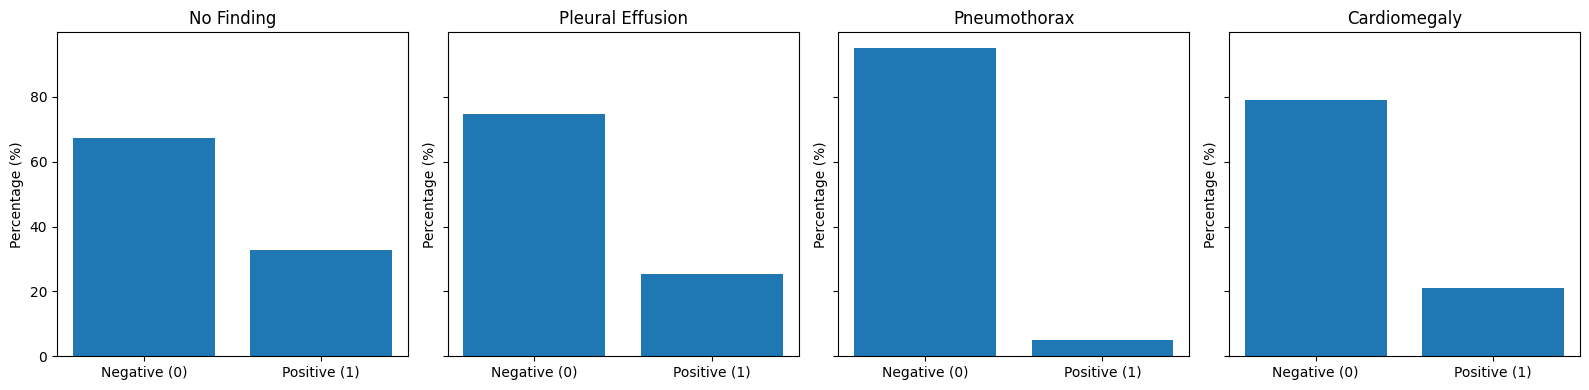

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

for ax, label in zip(axes, labels):
    dist = label_distribution(image_mask_df, label)
    ax.bar(dist["Label"], dist["Percentage (%)"])
    ax.set_title(label)
    ax.set_ylabel("Percentage (%)")

plt.tight_layout()
plt.savefig("final_label_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


In [42]:
df_percent = pd.DataFrame({
    "pathology": ["No Finding", "Pleural Effusion", "Pneumothorax", "Cardiomegaly"],
    "positive": [33, 25, 5, 21],
    "negative": [67, 75, 95, 79]
})


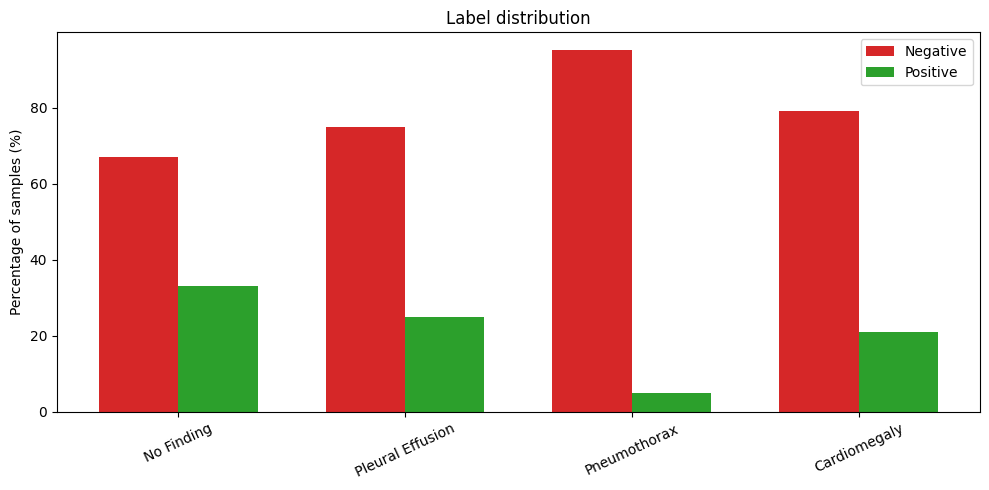

In [50]:
df_plot = df_percent.copy()

colors = plt.cm.tab10.colors

x = np.arange(len(df_plot))
width = 0.35

plt.figure(figsize=(10, 5))

# Negative
plt.bar(
    x - width / 2,
    df_plot["negative"],
    width,
    label="Negative",
    color=colors[3]
)

# Positive
plt.bar(
    x + width / 2,
    df_plot["positive"],
    width,
    label="Positive",
    color=colors[2]
)

plt.xticks(x, df_plot["pathology"], rotation=25)
plt.ylabel("Percentage of samples (%)")
plt.title("Label distribution")
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
#==========================Label Distribution===============================

In [ ]:
#====================Prevalence Analysis=============================

In [51]:
def compute_prevalence(df, label, group_col):
    """
    Computes prevalence P(y=1 | group)
    """
    prevalence = (
        df
        .groupby(group_col)[label]
        .mean()
        .reset_index()
        .rename(columns={label: "Prevalence"})
    )
    prevalence["Prevalence (%)"] = 100 * prevalence["Prevalence"]
    return prevalence


In [ ]:
#examples of prevalence 

In [53]:
prev_sex = compute_prevalence(
    image_mask_df,
    label="Pneumothorax",
    group_col="sex"
)

prev_sex["Sex"] = prev_sex["sex"].map(sex_map)
prev_sex


,sex,Prevalence,Prevalence (%),Sex
0,0,0.041241,4.124138,Female
1,1,0.054971,5.497094,Male


In [54]:
prev_race = compute_prevalence(
    image_mask_df,
    label="Cardiomegaly",
    group_col="race"
)

prev_race["Race"] = prev_race["race"].map(race_map)


In [56]:
prev_race

,race,Prevalence,Prevalence (%),Race
0,0,0.207161,20.716094,White
1,1,0.221787,22.178672,Black
2,2,0.216598,21.659800,Asian
3,3,0.213980,21.397965,Other


In [57]:
prev_age = compute_prevalence(
    df=image_mask_df,
    label="Pleural Effusion",
    group_col="age"
)

prev_age["Age group"] = prev_age["age"].map(age_map)
prev_age

,age,Prevalence,Prevalence (%),Age group
0,0,0.359621,35.962136,>80
1,1,0.288585,28.858540,60–80
2,2,0.193831,19.383085,40–60
3,3,0.130334,13.033393,18–40


In [58]:
prev_sex_race = compute_prevalence(
    df=image_mask_df,
    label="No Finding",
    group_col="sex_race"
)

prev_sex_race["SexRace"] = prev_sex_race["sex_race"].map(sex_race_map)
prev_sex_race

In [59]:
prev_sex_race

,sex_race,Prevalence,Prevalence (%),SexRace
0,0,0.297015,29.701455,White Male
1,1,0.321648,32.164839,White Female
2,2,0.372609,37.260892,Black Male
3,3,0.420898,42.089814,Black Female
4,4,0.301770,30.177039,Asian Male
5,5,0.359192,35.919166,Asian Female
6,6,0.296571,29.657095,Other Male
7,7,0.377535,37.753534,Other Female


In [ ]:
#All prevalences

In [66]:
def compute_prevalence(df, label, group_col):
    return (
        df.groupby(group_col)[label]
        .mean()
        .mul(100)
        .round(2)
    )

attribute_config = {
    "Sex": {
        "col": "sex",
        "map": sex_map
    },
    "Race": {
        "col": "race",
        "map": race_map
    },
    "Age": {
        "col": "age",
        "map": age_map
    },
    "SexRace": {
        "col": "sex_race",
        "map": sex_race_map
    }
}

pathologies = [
    "No Finding",
    "Pleural Effusion",
    "Pneumothorax",
    "Cardiomegaly"
]

In [67]:
rows = []

for attr_name, cfg in attribute_config.items():
    group_col = cfg["col"]
    group_map = cfg["map"]

    for group_value, group_label in group_map.items():
        row = {
            "Attribute": attr_name,
            "Group": group_label
        }

        for pathology in pathologies:
            prev = compute_prevalence(
                image_mask_df[image_mask_df[group_col] == group_value],
                pathology,
                group_col
            )
            row[pathology] = prev.iloc[0]

        rows.append(row)

prevalence_table = pd.DataFrame(rows)
prevalence_table


,Attribute,Group,No Finding,Pleural Effusion,Pneumothorax,Cardiomegaly
0,Sex,Female,35.11,24.57,4.12,21.20
1,Sex,Male,30.65,25.96,5.50,20.99
2,Race,White,30.77,27.72,5.28,20.72
3,Race,Black,40.09,16.65,2.66,22.18
4,Race,Asian,32.77,27.49,6.67,21.66
5,Race,Other,33.18,23.61,5.03,21.40
6,Age,18–40,51.36,13.03,5.75,12.46
7,Age,40–60,39.20,19.38,4.61,16.87
8,Age,60–80,27.67,28.86,5.03,23.66
9,Age,>80,20.47,35.96,4.31,28.39


/tmp/ipykernel_3381813/4024781522.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


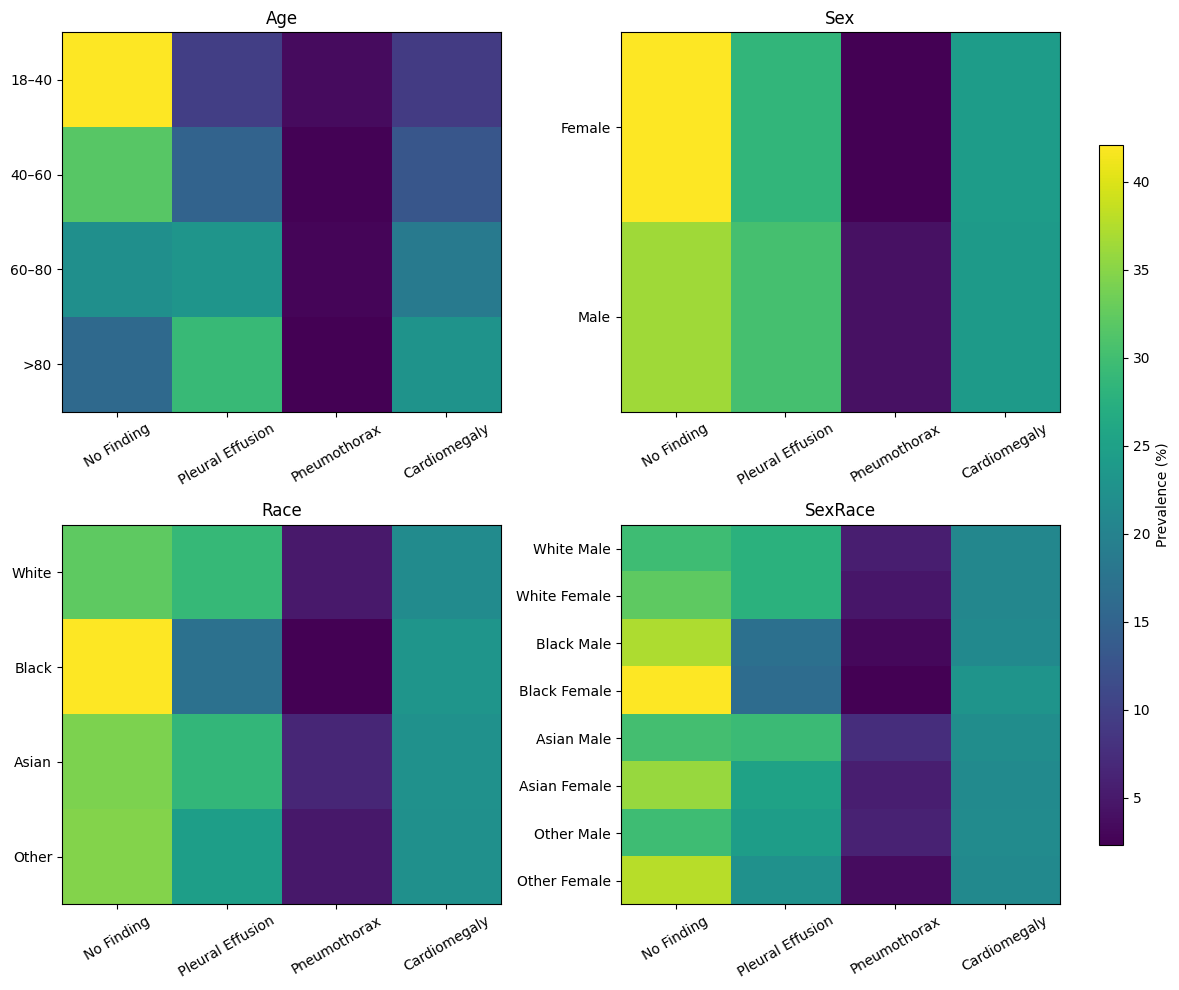

In [75]:
def plot_prevalence_heatmap(df, attribute, ax):

    sub_df = df[df["Attribute"] == attribute]

    values = sub_df[
        ["No Finding", "Pleural Effusion", "Pneumothorax", "Cardiomegaly"]
    ].values

    im = ax.imshow(values, aspect="auto")

    ax.set_xticks(np.arange(values.shape[1]))
    ax.set_xticklabels(
        ["No Finding", "Pleural Effusion", "Pneumothorax", "Cardiomegaly"],
        rotation=30
    )

    ax.set_yticks(np.arange(len(sub_df)))
    ax.set_yticklabels(sub_df["Group"])

    ax.set_title(attribute)

    return im


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

attributes = ["Age", "Sex", "Race", "SexRace"]

for ax, attr in zip(axes, attributes):
    im = plot_prevalence_heatmap(prevalence_table, attr, ax)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label="Prevalence (%)")

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.savefig("prevalence_distribution.png", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
#====================Prevalence Analysis=============================